# Problem Set 3 

# Question 1 
Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. 
Occupations 

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address. 

Step 3. Assign it to a variable called users 

Step 4. Discover what is the mean age per occupation 

Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

Step 6. For each occupation, calculate the minimum and maximum ages 

Step 7. For each combination of occupation and sex, calculate the mean age 

Step 8. For each occupation present the percentage of women and men 

In [1]:
!pip install pandas


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
import pandas as pd
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users= pd.read_csv(url, delimiter='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
df.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [36]:

# step
gender_counts = users.groupby(['occupation', 'gender']).size()
total_counts = users.groupby('occupation').size()
male_counts = gender_counts.unstack()['M']  # Male counts
male_ratio = male_counts / total_counts

male_ratio = pd.DataFrame({
    'Occupation': male_ratio.index,
    'Male Ratio': male_ratio.values
})

sorted_male_ratio = male_ratio.sort_values(by='Male Ratio', ascending=False)

print(sorted_male_ratio)

       Occupation  Male Ratio
2          doctor    1.000000
4        engineer    0.970149
19     technician    0.962963
15        retired    0.928571
14     programmer    0.909091
6       executive    0.906250
17      scientist    0.903226
5   entertainment    0.888889
9          lawyer    0.833333
16       salesman    0.750000
3        educator    0.726316
18        student    0.693878
13          other    0.657143
11      marketing    0.615385
20         writer    0.577778
12           none    0.555556
0   administrator    0.544304
1          artist    0.535714
10      librarian    0.431373
7      healthcare    0.312500
8       homemaker    0.142857


In [37]:
age_stats = df.groupby('occupation')['age'].agg(['min', 'max'])

print(age_stats)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [38]:
occupation_sex_mean_age = df.groupby(['occupation', 'gender'])['age'].mean()

print(occupation_sex_mean_age)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [44]:
gender_counts = df.groupby(['occupation', 'gender']).size()
total_counts = gender_counts.groupby('occupation').sum()

male_counts = gender_counts.unstack()['M']
female_counts = gender_counts.unstack()['F']

male_percentage = (male_counts / total_counts) * 100
female_percentage = (female_counts / total_counts) * 100

gender_percentage = pd.DataFrame({
    'Occupation': total_counts.index,
    'Male Percentage': male_percentage,
    'Female Percentage': female_percentage
})

print(gender_percentage)


                  Occupation  Male Percentage  Female Percentage
occupation                                                      
administrator  administrator        54.430380          45.569620
artist                artist        53.571429          46.428571
doctor                doctor       100.000000                NaN
educator            educator        72.631579          27.368421
engineer            engineer        97.014925           2.985075
entertainment  entertainment        88.888889          11.111111
executive          executive        90.625000           9.375000
healthcare        healthcare        31.250000          68.750000
homemaker          homemaker        14.285714          85.714286
lawyer                lawyer        83.333333          16.666667
librarian          librarian        43.137255          56.862745
marketing          marketing        61.538462          38.461538
none                    none        55.555556          44.444444
other                  ot

In [46]:
import pandas as pd
url= 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12= pd.read_csv(url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [48]:
goal= euro12['Goals']
print(goal)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [52]:
print(euro12['Team'].nunique())

16


In [53]:
print(euro12[['Team', 'Yellow Cards', 'Red Cards']])

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [54]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print(sorted_discipline)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [55]:
mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean()

print(mean_yellow_cards_per_team)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [56]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
teams_starting_with_G = teams_more_than_6_goals[teams_more_than_6_goals['Team'].str.startswith('G')]
print(teams_starting_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   

   Players Used  
5            17  

[1 rows x 35 columns]


In [57]:
first_7_columns = euro12.iloc[:, :7]

print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [61]:
all_columns_except_last_3 = euro12.iloc[:, :-3]

print(all_columns_except_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [62]:
selected_teams = ['England', 'Italy', 'Russia']
selected_teams_shooting_accuracy = euro12[euro12['Team'].isin(selected_teams)]['Shooting Accuracy']

print(selected_teams_shooting_accuracy)


3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object


# Question-3
Housing

In [64]:
import pandas as pd
import numpy as np

In [66]:
# Step 2
np.random.seed(42)
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [72]:
# Step 3
data = pd.concat([series1, series2, series3], axis=1)
# Step 4
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [68]:
# Step 5
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

In [69]:
# Step 6
print(bigcolumn.index)

RangeIndex(start=0, stop=300, step=1)


In [70]:
# Step 7
bigcolumn = bigcolumn.reindex(range(300))

print(bigcolumn)

0          3
1          4
2          1
3          3
4          3
       ...  
295    11154
296    14499
297    16295
298    22183
299    22874
Length: 300, dtype: int32


# Question 4 
Wind Statistics 

In [80]:
import pandas as pd
import datetime

#step1 ,2 , 3
wind_data = 'winds.txt'
data = pd.read_csv(wind_data, sep="\s+", parse_dates=[[0, 1, 2]])
data.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35592\1742303641.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(wind_data, sep="\s+", parse_dates=[[0, 1, 2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [81]:
# Step 4
def fix_date(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_date)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [82]:
# Step 5. 
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [83]:
# Step 6
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [84]:
# Step 7
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [85]:
# Step 8
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [86]:
# Step 9
loc_stats = data.describe(percentiles=[])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [87]:
# Step 10
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1) #min
day_stats['max'] = data.max(axis = 1) #max
day_stats['mean'] = data.mean(axis = 1) #mean
day_stats['standard_deviations'] = data.std(axis = 1) #standard deviations
day_stats.head()

,min,max,mean,standard_deviations
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [88]:
# Step 11
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [89]:
# Step 12
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [90]:
# Step 13
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [91]:
# Step 14
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [92]:
# Step 15
week = data.resample('W').agg(['min','max','mean','std'])
week.loc[week.index[1:53], "RPT":"MAL"] .head(5)

RPT                               VAL                    \
              min    max       mean       std   min    max       mean   
Yr_Mo_Dy                                                                
1961-01-08  10.58  18.50  13.541429  2.631321  6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392  3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402  3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061  9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408  9.46  24.21  15.460000   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  

[5 rows x 48 columns]

# Question 5

In [93]:
# Step 1,2,3
import pandas as pd
import numpy as np
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(data_url, sep = '\t')

In [94]:
# Step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [95]:
# Step 5
chipo.shape[0]

4622

In [96]:
# Step 6
chipo.shape[1]

5

In [97]:
# Step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [98]:
# Step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [99]:
# Step 9
most_ordered = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
most_ordered.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [100]:
# Step 10
most_ordered_item = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
most_ordered_item.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [101]:
# Step 11
most_ordered = chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False)
most_ordered.head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [102]:
# Step 12
chipo.quantity.sum()

4972

In [103]:
# Step 13
print(chipo['item_price'].head())
convert_to_float = lambda x: float(x[1:])
convert_to_float = lambda x: float(x[1:]) if x.startswith('$') else float('nan')

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


In [104]:
# Step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

'$2.39 $3.39 $3.39 $2.39 $16.98 $16.98 $10.98 $1.69 $11.75 $9.25 $9.25 $4.45 $8.75 $8.75 $11.25 $4.45 $2.39 $8.49 $8.49 $2.18 $2.18 $8.75 $4.45 $8.99 $3.39 $10.98 $3.39 $2.39 $8.49 $8.99 $1.09 $8.49 $2.39 $8.99 $1.69 $8.99 $1.09 $8.75 $8.75 $4.45 $2.95 $11.75 $2.15 $4.45 $11.25 $11.75 $8.75 $10.98 $8.99 $3.39 $8.99 $3.99 $8.99 $2.18 $2.18 $10.98 $1.09 $8.99 $2.39 $9.25 $11.25 $11.75 $2.15 $4.45 $9.25 $11.25 $8.75 $8.99 $8.99 $3.39 $8.99 $10.98 $8.99 $1.69 $8.99 $3.99 $8.75 $4.45 $8.75 $8.75 $2.15 $8.75 $11.25 $2.15 $9.25 $8.75 $8.75 $9.25 $8.49 $8.99 $1.09 $9.25 $2.95 $11.75 $11.75 $9.25 $11.75 $4.45 $9.25 $4.45 $11.75 $8.75 $8.75 $4.45 $8.99 $8.99 $3.99 $8.49 $3.39 $8.99 $1.09 $9.25 $4.45 $8.75 $2.95 $4.45 $2.39 $8.49 $8.99 $8.49 $1.09 $8.99 $3.99 $8.75 $9.25 $4.45 $11.25 $4.45 $8.99 $1.09 $9.25 $2.95 $4.45 $11.75 $4.45 $8.49 $2.39 $10.98 $22.50 $22.50 $11.75 $4.45 $11.25 $4.45 $11.25 $4.45 $11.25 $11.25 $11.75 $9.25 $4.45 $11.48 $17.98 $17.98 $1.69 $17.50 $17.50 $4.45 $8.49 $2.39 $17

In [105]:
# Step 15
chipo.order_id.value_counts().count()

1834

In [ ]:
# Step 16
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped['item_price'].mean()

In [107]:
# Step 17
chipo.item_name.value_counts().count()

50

# Question 6

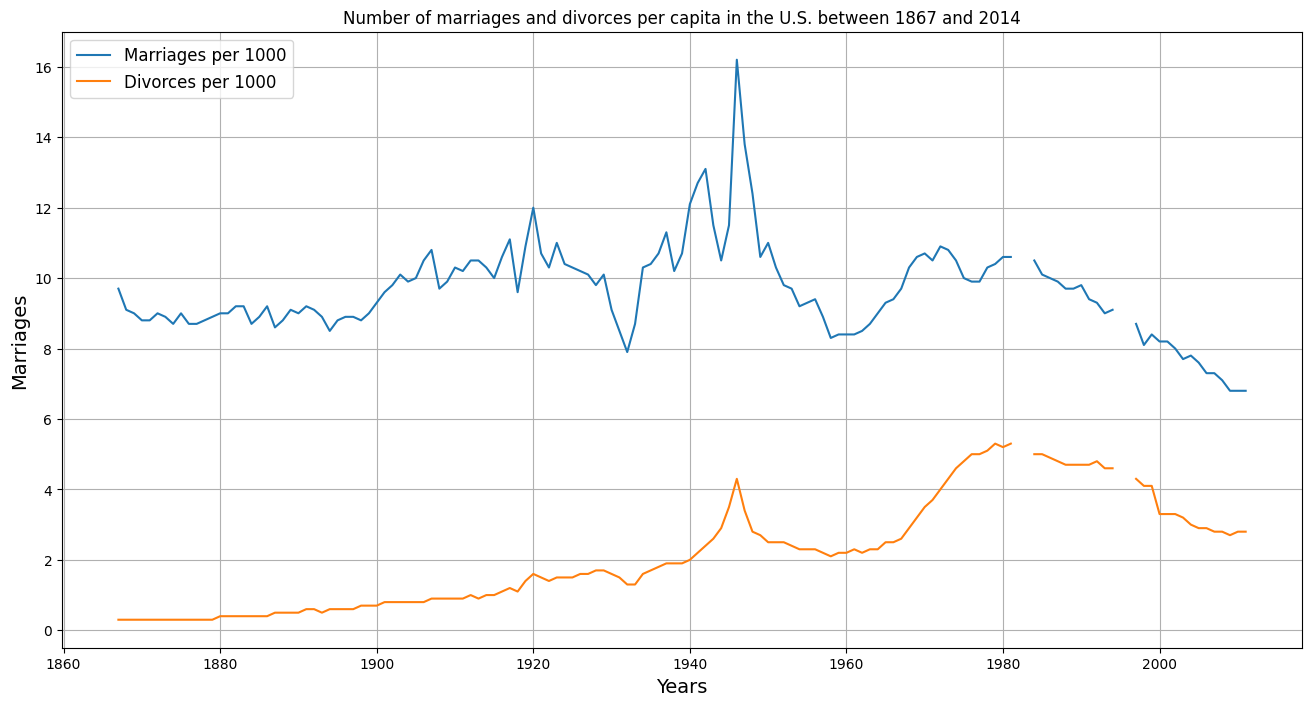

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')
arriages_divorces.head()
years = marriages_divorces['Year']
marriages = marriages_divorces['Marriages_per_1000']
divorces = marriages_divorces['Divorces_per_1000']
marriages_divorces = plt.figure(figsize=(16,8))
marriages_divorces = plt.plot(years, marriages, label='Marriages per 1000')
marriages_divorces = plt.plot(years, divorces, label='Divorces per 1000')
marriages_divorces = plt.title("Number of marriages and divorces per capita in the U.S. between 1867 and 2014")
marriages_divorces = plt.xlabel("Years",fontsize=14)
marriages_divorces = plt.legend(fontsize = 12, loc = "upper left")
marriages_divorces = plt.ylabel("Marriages",fontsize=14)
marriages_divorces = plt.grid(True)
marriages_divorces

# Question 7

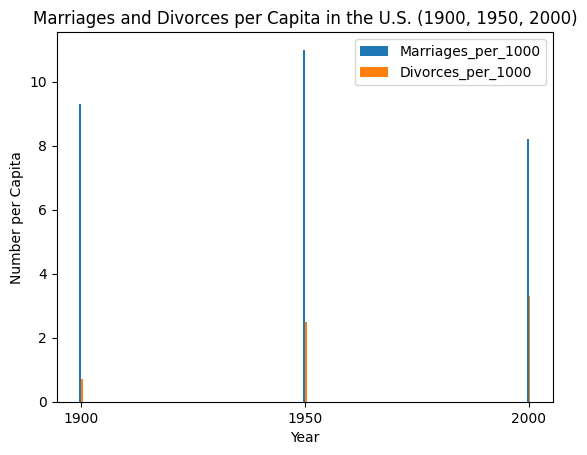

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

years = [1900, 1950, 2000]
selected_data = data[data['Year'].isin(years)]

fig, ax = plt.subplots()

ax.bar(selected_data['Year'], selected_data['Marriages_per_1000'], width=0.4, label='Marriages_per_1000')

ax.bar(selected_data['Year'] + 0.4, selected_data['Divorces_per_1000'], width=0.4, label='Divorces_per_1000')

ax.set_xlabel("Year")
ax.set_ylabel("Number per Capita")
ax.set_title("Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)")
ax.legend()
ax.set_xticks(selected_data['Year'] + 0.2)
ax.set_xticklabels(years)
plt.show()

# Question 8

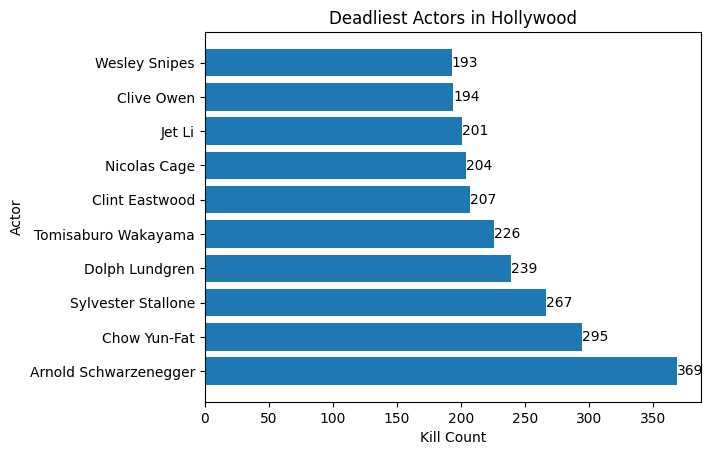

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')  # Replace 'your_data.csv' with your actual CSV file name

sorted_data = data.sort_values(by='Count', ascending=False)

fig, ax = plt.subplots()

ax.barh(sorted_data['Actor'], sorted_data['Count'])

for i, value in enumerate(sorted_data['Count']):
    ax.text(value, i, str(value), ha='left', va='center')

ax.set_xlabel("Kill Count")
ax.set_ylabel("Actor")
ax.set_title("Deadliest Actors in Hollywood")

plt.show()

# Question 9

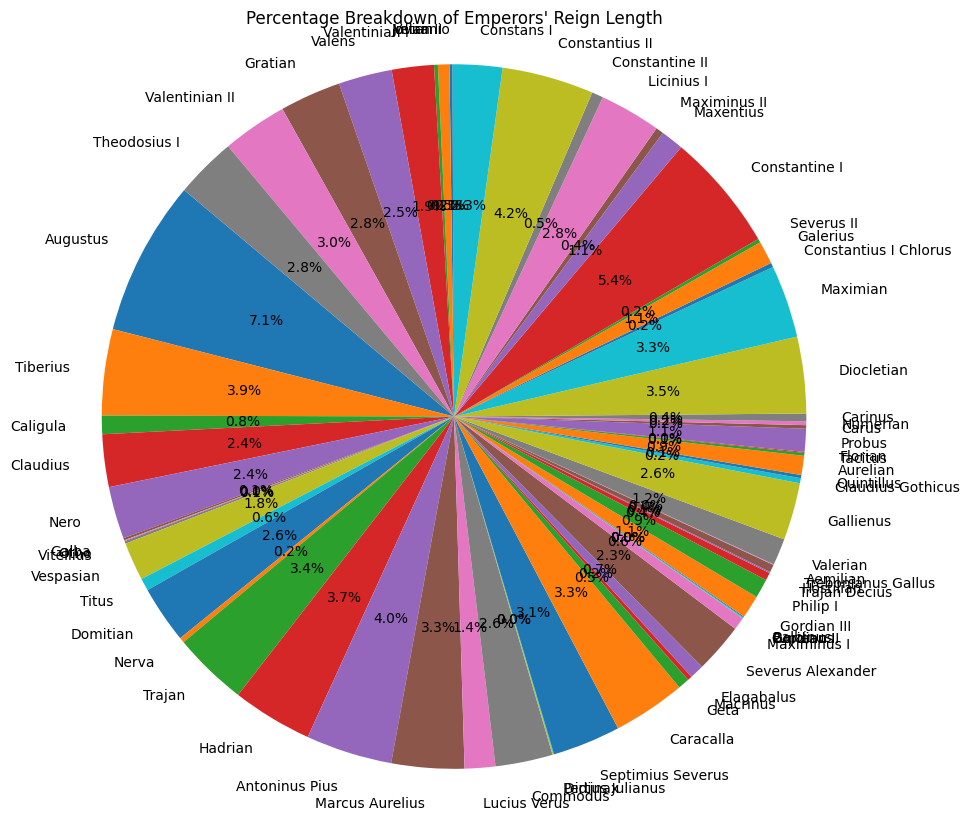

In [112]:
data = pd.read_csv('roman-emperor-reigns.csv')
total_reigns = data['Length_of_Reign'].sum()
data['Percentage'] = (data['Length_of_Reign'] / total_reigns) * 100
plt.figure(figsize=(10,10))
plt.pie(data['Percentage'], labels=data['Emperor'], autopct='%.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Breakdown of Emperors\' Reign Length')
plt.show()

# Question 10

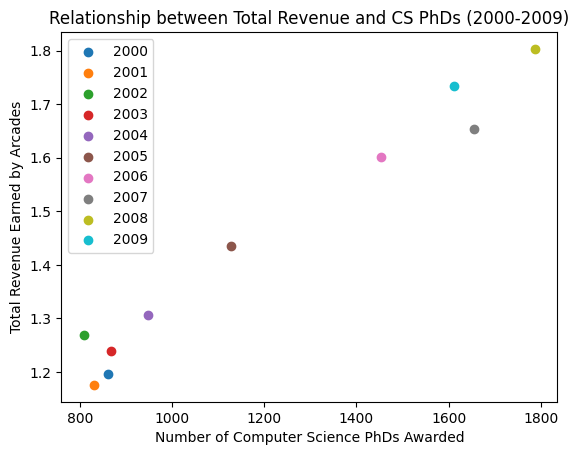

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv') 
years = df['Year']
revenues = df["Total Arcade Revenue (billions)"]
phd_awards = df["Computer Science Doctorates Awarded (US)"]

fig, ax = plt.subplots()

for i in range(len(years)):
    ax.scatter(phd_awards[i], revenues[i], label=str(years[i]))

ax.set_xlabel("Number of Computer Science PhDs Awarded")
ax.set_ylabel("Total Revenue Earned by Arcades")
ax.set_title("Relationship between Total Revenue and CS PhDs (2000-2009)")

ax.legend()
plt.show()